## Poissson Autoregression model fitting

This notebook contains the fitting of the Poisson Autorregression to each series in the dataset, generating an unique object to forecast with all independent models at the same time.

In [1]:
import os
import sys
import pickle
import pandas as pd

src_path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(src_path)

from PoissonAutoregression.PoissonAutoregression import MultivariatePoissonAutorregresion
from DataSimulation.utils import plot_fit

In [2]:
data = pd.read_csv('data.csv', header=None)
data.head()

0     1    2     3     4     5    6     7     8       9   ...     90  \
0   0.0  11.0  4.0  43.0  31.0  15.0  3.0  56.0   7.0   322.0  ...  233.0   
1  35.0   7.0  4.0  14.0  26.0  13.0  0.0  51.0   4.0   232.0  ...   53.0   
2  10.0   4.0  5.0   9.0  43.0  44.0  4.0  39.0   3.0   416.0  ...   39.0   
3  33.0   7.0  4.0  23.0  13.0  33.0  0.0  38.0  11.0   912.0  ...  215.0   
4   4.0   4.0  4.0  17.0  16.0  21.0  2.0  52.0  14.0  3409.0  ...   50.0   

      91     92     93    94   95     96    97     98     99  
0  109.0   91.0   65.0  16.0  3.0  123.0  17.0  117.0   39.0  
1    4.0   64.0  152.0  14.0  2.0  211.0   4.0  547.0   63.0  
2   51.0   48.0   91.0  21.0  6.0    7.0   1.0  688.0   50.0  
3    7.0   26.0  377.0  13.0  2.0   36.0   0.0  187.0   88.0  
4   37.0  231.0  321.0  14.0  3.0   30.0   0.0  343.0  171.0  

[5 rows x 100 columns]

In [3]:
test_size = 12
train_data = data.iloc[:-test_size, :].to_numpy()
test_data = data.iloc[-test_size:, :].to_numpy()
print(train_data.shape)
print(test_data.shape)

(188, 100)
(12, 100)


In [4]:
multi_ar_p = MultivariatePoissonAutorregresion()
multi_ar_p.fit(train_data)

The best model uses parameters p = 8 and q = 12 with a cv_score of 78.30740510639363
The best model uses parameters p = 12 and q = 4 with a cv_score of 37.08544354797656
The best model uses parameters p = 1 and q = 1 with a cv_score of 2.827891376031355
The best model uses parameters p = 1 and q = 2 with a cv_score of 608.4005448589602
The best model uses parameters p = 3 and q = 2 with a cv_score of 113.08371112813063
The best model uses parameters p = 9 and q = 1 with a cv_score of 1314.555137608401
The best model uses parameters p = 1 and q = 2 with a cv_score of 2.9827776523593745
The best model uses parameters p = 4 and q = 1 with a cv_score of 674.2182321011494
The best model uses parameters p = 11 and q = 1 with a cv_score of 37.63791141487097
The best model uses parameters p = 2 and q = 1 with a cv_score of 16790803.061242297
The best model uses parameters p = 7 and q = 2 with a cv_score of 1190.6831246618526


c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\User\Python\Environments\tensorflow_3.9\lib\site-packag

The best model uses parameters p = 2 and q = 3 with a cv_score of 8.066706020010798
The best model uses parameters p = 1 and q = 2 with a cv_score of 419.91889252165777
The best model uses parameters p = 9 and q = 3 with a cv_score of 36163.63306519792
The best model uses parameters p = 5 and q = 1 with a cv_score of 51291.0117494532
The best model uses parameters p = 8 and q = 10 with a cv_score of 114.61504060506961
The best model uses parameters p = 6 and q = 1 with a cv_score of 1.2093864503479954
The best model uses parameters p = 3 and q = 2 with a cv_score of 79.02602594115815
The best model uses parameters p = 5 and q = 1 with a cv_score of 26502.064128274167
The best model uses parameters p = 2 and q = 3 with a cv_score of 50.755984402477814
The best model uses parameters p = 3 and q = 1 with a cv_score of 368.0073461241762
The best model uses parameters p = 8 and q = 1 with a cv_score of 39163.24088019533
The best model uses parameters p = 5 and q = 8 with a cv_score of 56.70

time: 415m, 38.9s

In [5]:
fitted_values = multi_ar_p.fitted_values

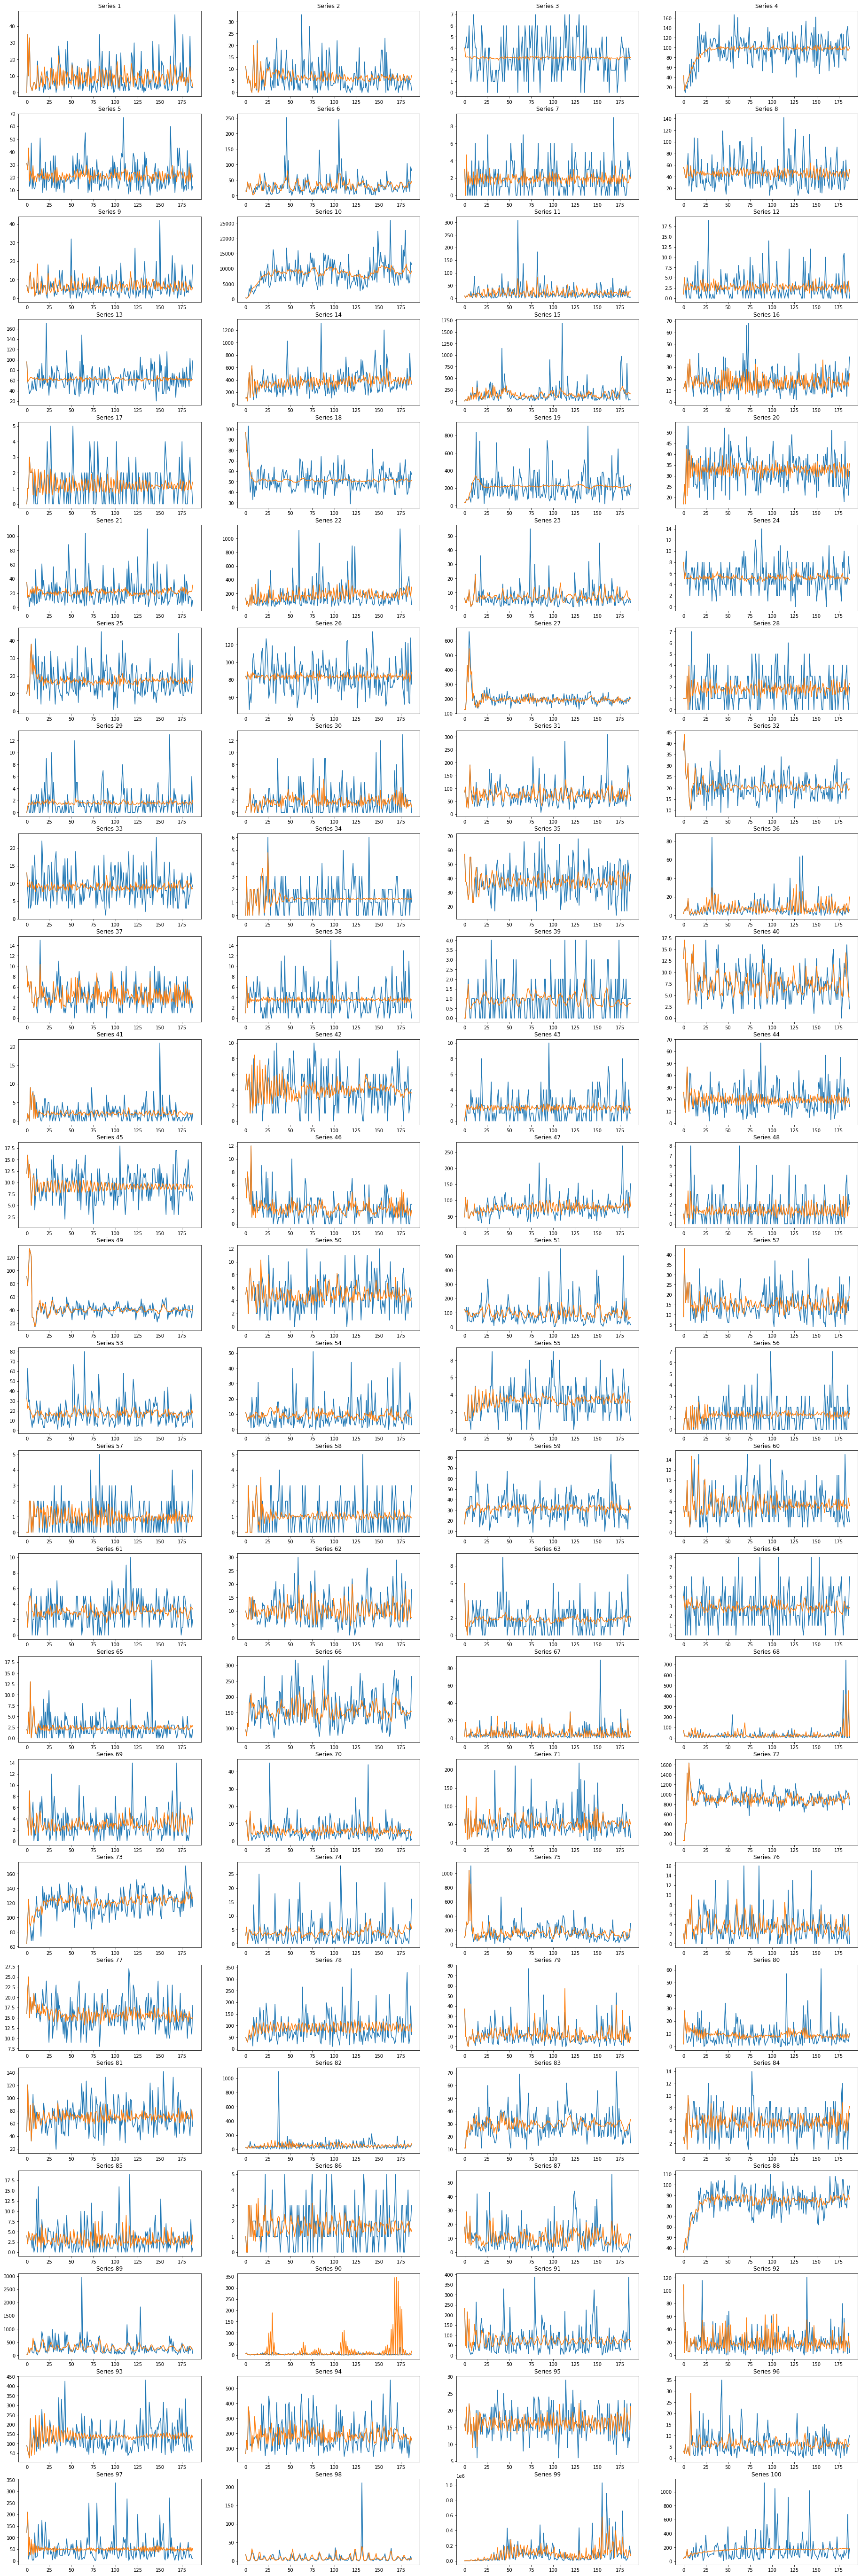

In [6]:
plot_fit(train_data, fitted_values, cols=4)

In [7]:
with open("poisson_autoregression.pkl", "wb") as file:
    pickle.dump(multi_ar_p, file)